In [10]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
%matplotlib inline


In [48]:
words = open('/home/blu-bridge006/Desktop/neural netwoks/input files/indian_names.txt').read().splitlines()
words[:10]

['aabod',
 'aabid',
 'aabida',
 'aachal',
 'aadesh',
 'aadil',
 'aadish',
 'aaditya',
 'aaenab',
 'aafreen']

In [49]:
len(words)

6487

In [50]:
min(len(w) for w in words)


0

In [51]:
max(len(w) for w in words)

19

In [16]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

b



{('<S>', 'a'): 589,
 ('a', 'a'): 151,
 ('a', 'b'): 236,
 ('b', 'o'): 24,
 ('o', 'd'): 36,
 ('d', '<E>'): 192,
 ('b', 'i'): 168,
 ('i', 'd'): 119,
 ('d', 'a'): 231,
 ('a', '<E>'): 1558,
 ('a', 'c'): 33,
 ('c', 'h'): 260,
 ('h', 'a'): 1171,
 ('a', 'l'): 550,
 ('l', '<E>'): 394,
 ('a', 'd'): 227,
 ('d', 'e'): 313,
 ('e', 's'): 241,
 ('s', 'h'): 1237,
 ('h', '<E>'): 409,
 ('d', 'i'): 200,
 ('i', 'l'): 188,
 ('i', 's'): 286,
 ('i', 't'): 266,
 ('t', 'y'): 43,
 ('y', 'a'): 372,
 ('a', 'e'): 9,
 ('e', 'n'): 318,
 ('n', 'a'): 713,
 ('b', '<E>'): 80,
 ('a', 'f'): 67,
 ('f', 'r'): 15,
 ('r', 'e'): 180,
 ('e', 'e'): 503,
 ('n', '<E>'): 626,
 ('r', 'i'): 396,
 ('i', 'n'): 479,
 ('f', 't'): 7,
 ('t', 'a'): 388,
 ('a', 'g'): 106,
 ('g', 'a'): 126,
 ('a', 'n'): 1402,
 ('n', 'd'): 403,
 ('a', 'h'): 223,
 ('h', 'i'): 422,
 ('i', 'm'): 166,
 ('m', '<E>'): 346,
 ('a', 'j'): 290,
 ('j', 'a'): 344,
 ('j', 'i'): 122,
 ('i', 'v'): 42,
 ('v', '<E>'): 60,
 ('a', 'k'): 254,
 ('k', 'a'): 401,
 ('n', 'k'): 95,
 (

In [17]:
max(b[i] for i in b)    

1558

In [18]:
min(b[i] for i in b)

1

In [19]:
sorted_b = sorted(b.items(), key= lambda kv: kv[1], reverse=True)
#sorted_b = sorted(b.items(), key= lambda kv: -kv[1])

In [20]:
sorted_b

[(('a', '<E>'), 1558),
 (('a', 'n'), 1402),
 (('s', 'h'), 1237),
 (('<S>', 's'), 1225),
 (('h', 'a'), 1171),
 (('r', 'a'), 1015),
 (('a', 'r'), 933),
 (('i', '<E>'), 919),
 (('n', 'a'), 713),
 (('a', 'm'), 659),
 (('m', 'a'), 630),
 (('n', '<E>'), 626),
 (('s', 'a'), 605),
 (('<S>', 'a'), 589),
 (('r', '<E>'), 574),
 (('<S>', 'r'), 551),
 (('a', 'l'), 550),
 (('<S>', 'm'), 550),
 (('e', 'e'), 503),
 (('i', 'n'), 479),
 (('h', 'i'), 422),
 (('h', '<E>'), 409),
 (('a', 's'), 404),
 (('n', 'd'), 403),
 (('k', 'a'), 401),
 (('<S>', 'b'), 398),
 (('r', 'i'), 396),
 (('l', '<E>'), 394),
 (('t', 'a'), 388),
 (('l', 'a'), 384),
 (('a', 't'), 383),
 (('<S>', 'k'), 380),
 (('<S>', 'p'), 379),
 (('y', 'a'), 372),
 (('<S>', 'n'), 360),
 (('m', '<E>'), 346),
 (('j', 'a'), 344),
 (('n', 'i'), 325),
 (('e', 'n'), 318),
 (('p', 'a'), 317),
 (('d', 'e'), 313),
 (('e', 'r'), 306),
 (('t', '<E>'), 304),
 (('<S>', 'j'), 297),
 (('<S>', 'd'), 296),
 (('a', 'j'), 290),
 (('u', '<E>'), 288),
 (('i', 's'), 28

In [21]:
a = torch.zeros((3,5), dtype=torch.int32)

In [22]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [28]:
N = torch.zeros((28,28), dtype=torch.int32)


In [32]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i +1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s  for s,i in stoi.items()}


In [30]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in  zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

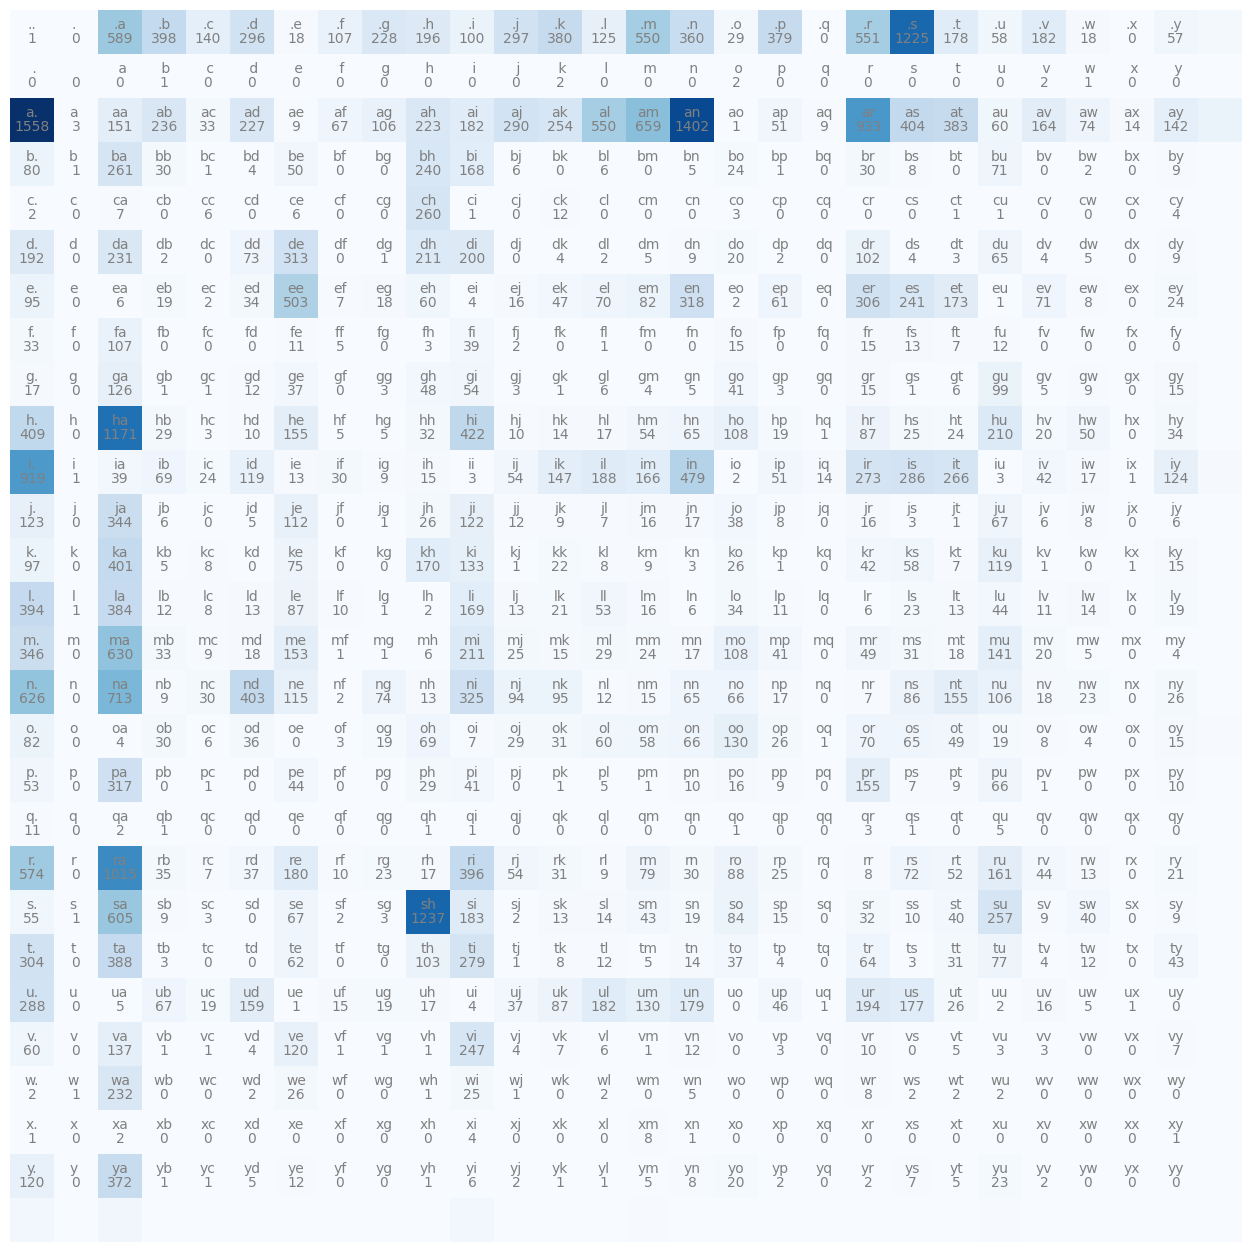

In [31]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [33]:
N[0, :]

tensor([   1,    0,  589,  398,  140,  296,   18,  107,  228,  196,  100,  297,
         380,  125,  550,  360,   29,  379,    0,  551, 1225,  178,   58,  182,
          18,    0,   57,   25], dtype=torch.int32)

In [34]:
p = N[0].float()
p = p/p.sum()
p

tensor([1.5415e-04, 0.0000e+00, 9.0797e-02, 6.1353e-02, 2.1582e-02, 4.5630e-02,
        2.7748e-03, 1.6495e-02, 3.5147e-02, 3.0214e-02, 1.5415e-02, 4.5784e-02,
        5.8579e-02, 1.9269e-02, 8.4785e-02, 5.5496e-02, 4.4705e-03, 5.8425e-02,
        0.0000e+00, 8.4939e-02, 1.8884e-01, 2.7439e-02, 8.9410e-03, 2.8056e-02,
        2.7748e-03, 0.0000e+00, 8.7868e-03, 3.8539e-03])

In [35]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'i'

In [36]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [37]:
torch.multinomial(p, num_samples=50, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2])

In [38]:
P = N.float()
P.shape

torch.Size([28, 28])

In [39]:
P /= P.sum(1, keepdim=True)
P[0].sum()


tensor(1.)

In [41]:
g = torch.Generator().manual_seed(2147483647)

for i in range(4):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))


itohal.
shabray.
t.
been.


In [42]:
p

tensor([0.2021, 0.0000, 0.2302, 0.0029, 0.0097, 0.1301, 0.0371, 0.0006, 0.0239,
        0.0042, 0.1049, 0.0304, 0.0307, 0.0039, 0.0048, 0.0210, 0.0213, 0.0055,
        0.0000, 0.0023, 0.0278, 0.0500, 0.0342, 0.0058, 0.0074, 0.0000, 0.0084,
        0.0006])

In [43]:
log_likelihood = 0.0
n=0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in  zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprpob = torch.log(prob)
        log_likelihood += logprpob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprpob:.4f}')

print(log_likelihood)
print(log_likelihood/n)
nll = -log_likelihood/n
print(nll)

tensor(-112356.1484)
tensor(-2.3552)
tensor(2.3552)


In [52]:
#Neural Net starts
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in  zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

xs,ys

(tensor([ 0,  2,  2,  3, 16,  5]), tensor([ 2,  2,  3, 16,  5,  0]))

In [53]:
xenc = F.one_hot(xs, num_classes=28).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [58]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .a (indexes 0,2)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0603, 0.0099, 0.0122, 0.0042, 0.0167, 0.0122, 0.0027, 0.0230, 0.0136,
        0.0311, 0.0078, 0.0276, 0.0091, 0.0082, 0.0496, 0.2363, 0.0599, 0.0025,
        0.0248, 0.0054, 0.0337, 0.0108, 0.0029, 0.0197, 0.0117, 0.1527, 0.1450,
        0.0064], grad_fn=<SelectBackward0>)
label (actual next character): 2
probability assigned by the net to the the correct character: 0.012234807945787907
log likelihood: -4.403470039367676
negative log likelihood: 4.403470039367676
--------
bigram example 2: aa (indexes 2,2)
input to the neural net: 2
output probabilities from the neural net: tensor([0.0295, 0.0324, 0.0081, 0.0092, 0.0231, 0.0163, 0.0071, 0.0043, 0.0515,
        0.0083, 0.1156, 0.1705, 0.0086, 0.0346, 0.0374, 0.0919, 0.0071, 0.0104,
        0.0098, 0.1162, 0.0240, 0.0544, 0.0108, 0.0218, 0.0063, 0.0702, 0.0154,
        0.0052], grad_fn=<SelectBackward0>)
label (actua

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [55]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((28,28), generator=g, requires_grad=True)


In [132]:
logits = xenc @ W

counts = logits.exp()
probs = counts/counts.sum(1, keepdim=True)
loss = -probs[torch.arange(6), ys].log().mean()

In [133]:
#BACKWARDPASS

W.grad = None
loss.backward()

In [134]:
W.data += -.1 * W.grad

In [135]:
loss.item()

0.2311328500509262

In [138]:
g = torch.Generator().manual_seed(2147483647+6)

for i in range(5):
  
  out = []
  ix = 0

  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=28).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character... 17th and 18th line combinedly known as SOFTMAX FUNCTION.
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))


aabod.
abod.
abod.
abod.
abod.
